In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
df=pd.read_csv("survey_data.csv")

In [ ]:
df=df.sort_values(by="App_name")
df

,Distance_km,Time_of_Day,Delivery_Time_min,App_name
0,4.30,Night,25,domino
28,1.02,Afternoon,34,domino
33,2.10,Evening,36,domino
36,2.09,Night,36,domino
39,4.80,Morning,47,domino
...,...,...,...,...
50,3.20,Night,42,zomato
51,6.30,Evening,111,zomato
52,11.90,Evening,69,zomato
12,3.60,Morning,28,zomato


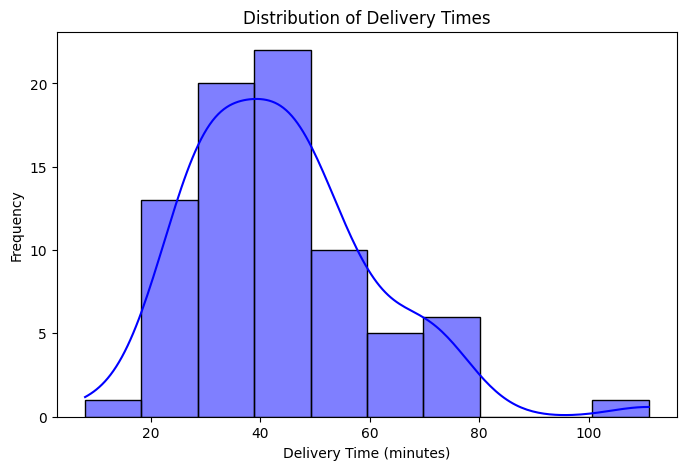

(       Distance_km  Delivery_Time_min
 count    78.000000          78.000000
 mean      6.027051          43.820513
 std       2.942397          16.761694
 min       1.020000           8.000000
 25%       3.525000          31.000000
 50%       5.950000          43.000000
 75%       8.100000          52.000000
 max      11.900000         111.000000,
 App_name
 domino    36.172414
 swiggy    42.736842
 zomato    51.900000
 Name: Delivery_Time_min, dtype: float64,
 Time_of_Day
 Afternoon    39.454545
 Evening      49.083333
 Morning      44.588235
 Night        40.933333
 Name: Delivery_Time_min, dtype: float64,
 0.6099761033933115)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
summary_stats = df.describe()

# Distribution of delivery time
plt.figure(figsize=(8, 5))
sns.histplot(df["Delivery_Time_min"], bins=10, kde=True, color="blue")
plt.title("Distribution of Delivery Times")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.show()

# Average delivery time per app
avg_delivery_time_per_app = df.groupby("App_name")["Delivery_Time_min"].mean()

# Delivery time based on time of day
avg_delivery_time_per_time = df.groupby("Time_of_Day")["Delivery_Time_min"].mean()

# Correlation between distance and delivery time
correlation = df["Distance_km"].corr(df["Delivery_Time_min"])

summary_stats, avg_delivery_time_per_app, avg_delivery_time_per_time, correlation


<ipython-input-4-931a4d560341>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="App_name", y="Delivery_Time_min", data=df, palette="coolwarm")


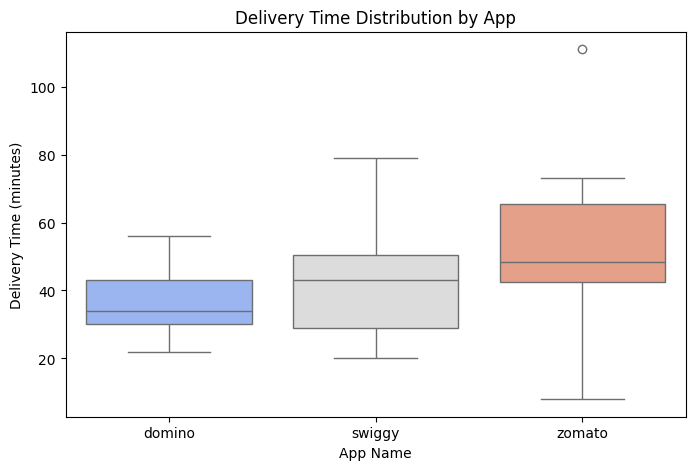

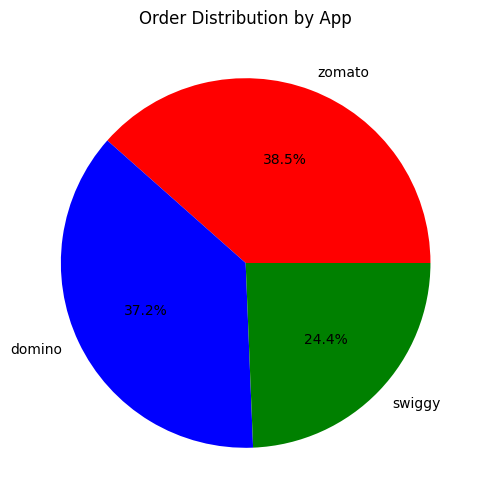

(App_name
 domino    10.695781
 swiggy     7.406743
 zomato     8.269358
 Name: Time_per_km, dtype: float64,
 Time_of_Day
 Afternoon    8.420860
 Evening      8.887564
 Morning      9.167880
 Night        9.638140
 Name: Time_per_km, dtype: float64)

In [ ]:
import numpy as np

# Creating additional insights

# Delivery time per kilometer to see efficiency
df["Time_per_km"] = df["Delivery_Time_min"] / df["Distance_km"]
avg_time_per_km_per_app = df.groupby("App_name")["Time_per_km"].mean()
avg_time_per_km_per_time = df.groupby("Time_of_Day")["Time_per_km"].mean()

# Boxplot to check distribution of delivery times per app
plt.figure(figsize=(8, 5))
sns.boxplot(x="App_name", y="Delivery_Time_min", data=df, palette="coolwarm")
plt.title("Delivery Time Distribution by App")
plt.xlabel("App Name")
plt.ylabel("Delivery Time (minutes)")
plt.show()

# Pie chart of orders per app
order_counts = df["App_name"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(order_counts, labels=order_counts.index, autopct='%1.1f%%', colors=["red", "blue", "green"])
plt.title("Order Distribution by App")
plt.show()



avg_time_per_km_per_app, avg_time_per_km_per_time


In [ ]:
df.describe()

,Distance_km,Delivery_Time_min,Time_per_km
count,78.000000,78.000000,78.000000
mean,6.027051,43.820513,8.961366
std,2.942397,16.761694,5.569024
min,1.020000,8.000000,3.521127
25%,3.525000,31.000000,5.668919
50%,5.950000,43.000000,6.931492
75%,8.100000,52.000000,10.000000
max,11.900000,111.000000,33.333333


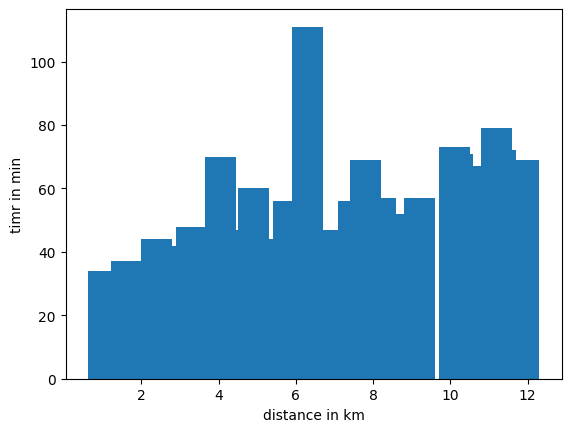

In [ ]:
plt.bar(df["Distance_km"],df["Delivery_Time_min"])
plt.xlabel("distance in km")
plt.ylabel("timr in min")
plt.show()

In [ ]:
domino_dist=[]
domino_time=[]
zomato_dist=[]
zomato_time=[]
swiggy_time=[]
swiggy_dist=[]
for i in df.index:
    if df.loc[i,"App_name"]=="domino":
        domino_dist.append(df.loc[i,"Distance_km"])
        domino_time.append(df.loc[i,"Delivery_Time_min"])
    elif df.loc[i,"App_name"]=="swiggy":
        swiggy_dist.append(df.loc[i,"Distance_km"])
        swiggy_time.append(df.loc[i,"Delivery_Time_min"])
    else:
        zomato_dist.append(df.loc[i,"Distance_km"])
        zomato_time.append(df.loc[i,"Delivery_Time_min"])
print("time takken by domino:",domino_time)
print()
print("time takken by swiggy:",swiggy_time)
print()
print("time takken by zomato:",zomato_time)


time takken by domino: [25, 34, 36, 36, 47, 50, 31, 38, 22, 32, 43, 28, 30, 45, 31, 37, 52, 44, 56, 30, 41, 38, 31, 34, 31, 30, 25, 24, 48]

time takken by swiggy: [20, 42, 40, 27, 31, 20, 58, 49, 48, 57, 79, 36, 43, 52, 45, 44, 69, 27, 25]

time takken by zomato: [35, 49, 57, 72, 44, 73, 35, 71, 28, 48, 73, 70, 45, 27, 47, 67, 8, 56, 46, 36, 44, 61, 60, 52, 47, 42, 111, 69, 28, 56]


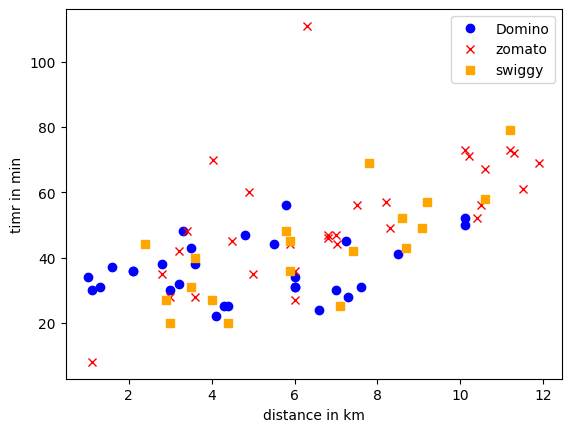

In [ ]:
plt.plot(domino_dist,domino_time,"o",color="blue",label={"Domino"})
plt.plot(zomato_dist,zomato_time,"x",color="red",label={"zomato"})
plt.plot(swiggy_dist,swiggy_time,"s",color="orange",label={"swiggy"})
plt.xlabel("distance in km")
plt.ylabel("timr in min")
plt.legend()
plt.show()

average time takken in delivery by domino 36.172413793103445
average time takken in delivery by swiggy 51.9
average time takken in delivery by zomato 42.73684210526316


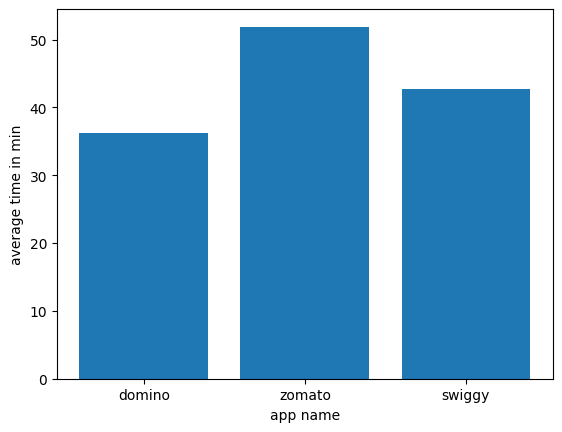

In [ ]:
print("average time takken in delivery by domino",np.mean(domino_time))
print("average time takken in delivery by swiggy",np.mean(zomato_time))
print("average time takken in delivery by zomato",np.mean(swiggy_time))
plt.bar(["domino","zomato","swiggy"],[np.mean(domino_time),np.mean(zomato_time),np.mean(swiggy_time)])
plt.xlabel("app name")
plt.ylabel("average time in min")
plt.show()

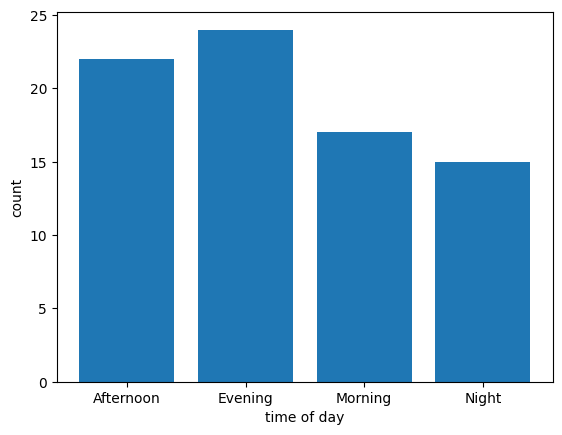

In [ ]:
new=df.groupby("Time_of_Day").count()
new.head()
plt.bar(new.index,new["Distance_km"])
plt.xlabel("time of day")
plt.ylabel("count")
plt.show()

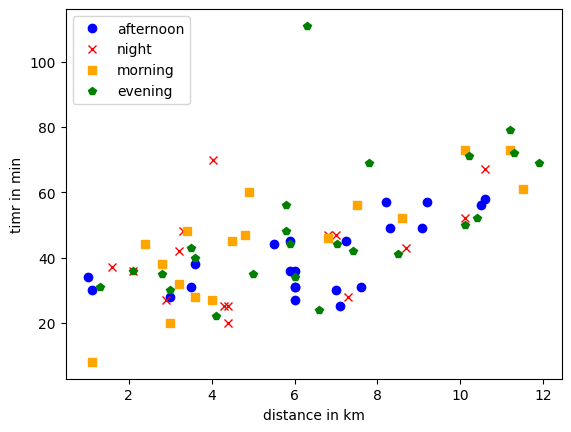

the avergae time it took in food delevery in afternoon is 39.45454545454545
the avergae time it took in food delevery in night is 40.93333333333333
the avergae time it took in food delevery in morning is 44.588235294117645
the avergae time it took in food delevery in evening is 49.083333333333336


In [ ]:
df_afternoon=df[df["Time_of_Day"]=="Afternoon"]
df_night=df[df["Time_of_Day"]=="Night"]
df_morning=df[df["Time_of_Day"]=="Morning"]
df_evening=df[df["Time_of_Day"]=="Evening"]
plt.plot(df_afternoon["Distance_km"],df_afternoon["Delivery_Time_min"],"o",color="blue",label={"afternoon"})
plt.plot(df_night["Distance_km"],df_night["Delivery_Time_min"],"x",color="red",label={"night"})
plt.plot(df_morning["Distance_km"],df_morning["Delivery_Time_min"],"s",color="orange",label={"morning"})
plt.plot(df_evening["Distance_km"],df_evening["Delivery_Time_min"],"p",color="green",label={"evening"})
plt.xlabel("distance in km")
plt.ylabel("timr in min")
plt.legend()
plt.show()
print("the avergae time it took in food delevery in afternoon is",df_afternoon["Delivery_Time_min"].mean())
print("the avergae time it took in food delevery in night is",df_night["Delivery_Time_min"].mean())
print("the avergae time it took in food delevery in morning is",df_morning["Delivery_Time_min"].mean())
print("the avergae time it took in food delevery in evening is",df_evening["Delivery_Time_min"].mean())

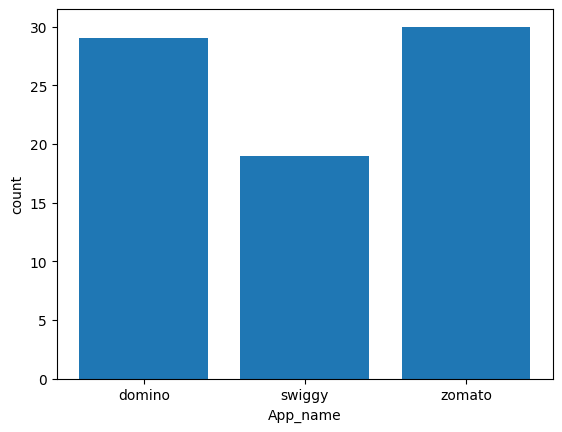

In [ ]:
new=df.groupby("App_name").count()
new.head()
plt.bar(new.index,new["Distance_km"])
plt.xlabel("App_name")
plt.ylabel("count")
plt.show()

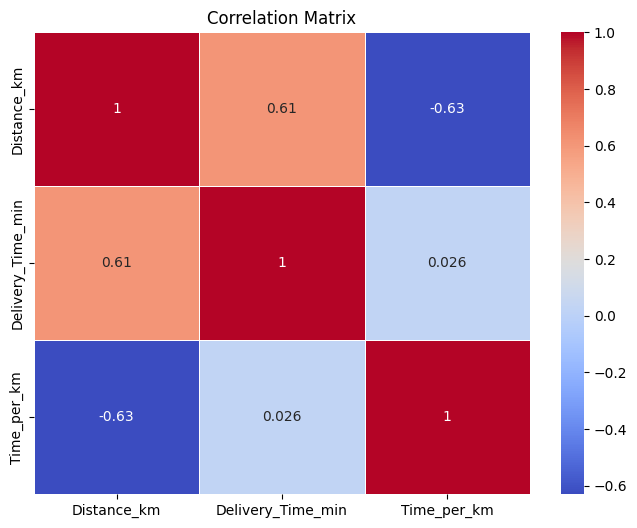

In [ ]:
newdf=df.copy()
newdf=newdf.drop(["Time_of_Day","App_name"],axis=1)
corr_matrix = newdf.corr()
import seaborn as sns
# Plot the correlation matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Title and show the plot
plt.title("Correlation Matrix")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Selecting features and target variable
X = df[["Distance_km", "Time_per_km"]]
y = df["Delivery_Time_min"]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Ensemble Model - Voting Regressor
ensemble_model = VotingRegressor(estimators=[('lr', lr), ('rf', rf), ('gbr', gbr)])
ensemble_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = ensemble_model.predict(X_test_scaled)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2


(2.8376205590704178, 0.8524385950327058)

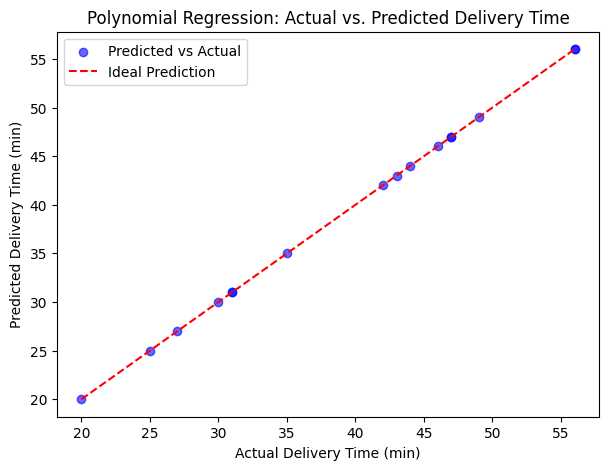

(4.6629367034256575e-15, 1.0)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Creating a Polynomial Regression model (degree 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train_scaled, y_train)

# Predictions
y_poly_pred = poly_model.predict(X_test_scaled)

# Scatter plot with polynomial regression curve
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_poly_pred, alpha=0.6, color='blue', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='dashed', color='red', label="Ideal Prediction")
plt.xlabel("Actual Delivery Time (min)")
plt.ylabel("Predicted Delivery Time (min)")
plt.title("Polynomial Regression: Actual vs. Predicted Delivery Time")
plt.legend()
plt.show()

# Model evaluation
mae_poly = mean_absolute_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)

mae_poly, r2_poly


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


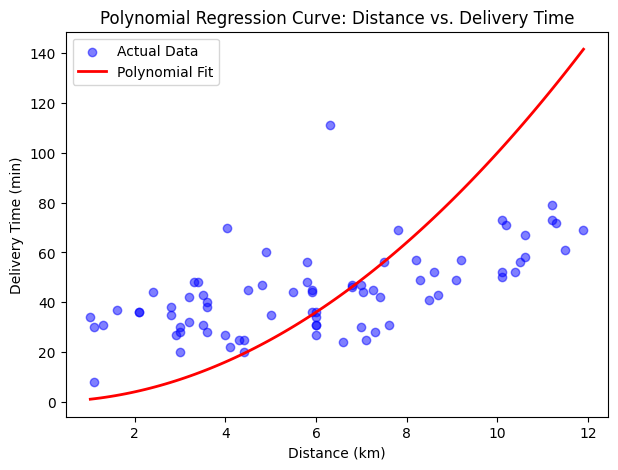

In [ ]:
# Generating polynomial curve fit for visualization
X_range = np.linspace(X["Distance_km"].min(), X["Distance_km"].max(), 100).reshape(-1, 1)
X_range_scaled = scaler.transform(np.hstack((X_range, X_range)))  # Transforming for consistency

y_poly_curve = poly_model.predict(X_range_scaled)

# Plot polynomial regression curve
plt.figure(figsize=(7, 5))
plt.scatter(X["Distance_km"], y, alpha=0.5, color='blue', label="Actual Data")
plt.plot(X_range, y_poly_curve, color='red', linewidth=2, label="Polynomial Fit")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (min)")
plt.title("Polynomial Regression Curve: Distance vs. Delivery Time")
plt.legend()
plt.show()
